<a href="https://colab.research.google.com/github/Sowrya993/sowrya/blob/main/email_spam_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **EMAIL SPAM DETECTION USING MACHINE LEARNING**
In this project we are training a machine learning model to determine whether the messages found in an email is closer to spam emails or safe ones(ham emails).

To do this we are using the spam.csv dataset


**IMPORTING THE LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt


**LOADING THE DATASET**


In [2]:
df=pd.read_csv('spam.csv',encoding="latin1")
print(df)

     label                                            meassge Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


We know that coding maps only a limited number of str strings to unicode characters,an illegal sequence of str characters will cause the coding specificdecode to fail so we get the UnicodeDecodeError Hence we encode the data
df.columns

In [3]:
df.columns

Index(['label', 'meassge', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

Here we can see 5 columns every column is of 'object' type that is, all are categorical columns.we dont use the columns 'unnamed:2','unnamed:3','unnamed:4' for training our model hence we drop those columns.

**DROPPING THE UNNECESSARY COLUMNS**


In [4]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

**DISPLAYING THE FIRST FIVE ROWS OF OUR DATASET**

In [5]:
df.head()

,label,meassge
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


After dropping the columns we can see there are only two columns in our dataset those are 'label' and 'message'.

**COUNTING THE NUMBER OF HAM AND SPAM MESSAGES PRESENT IN OUR DATASET AND VISUALISING IN A PICTORIAL WAY**

ham     4825
spam     747
Name: label, dtype: int64


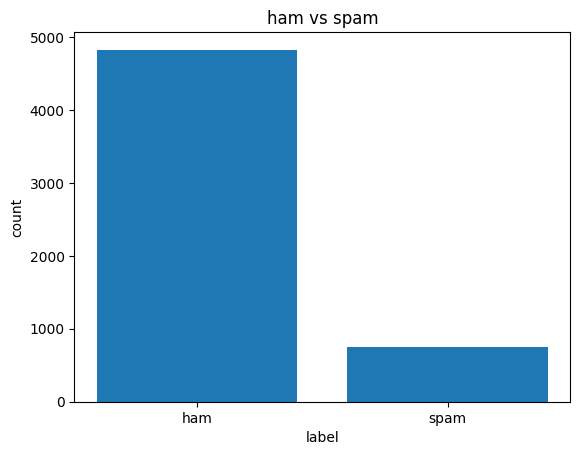

In [7]:
count=df.label.value_counts()
print(count)
plt.bar(count.index,count.values)
plt.title('ham vs spam')
plt.xlabel('label')
plt.ylabel('count')
plt.show()


**CHECKING FOR MISSING VALUES**

In [8]:
df.isnull().any()

label      False
meassge    False
dtype: bool

we can see we got output as False so there are no missing values in our dataset

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   meassge  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


here we can see we got the datatype of our columns as object hence they are called as categorical columns but our training model cannot undersatand the str format so we have to encode the data.

**ENCODING THE CATEGORICAL DATA**

In [10]:
df.replace({'label':{'ham':0,'spam':1}},inplace=True)

we given that in label column all the ham shoulsd be encoded as '0' and all the spam should be encoded as '1'

In [11]:
df.head()

,label,meassge
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


here we can observe that instead of ham we got 0 and instead of spam we got 1.

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

CountVectorizer in python is a method helps to convert text to numerical data.

**SEPERATING THE INPUT AND OUTPUT COLUMNS**

In [26]:
x=df['meassge']
y=df['label']
x=cv.fit_transform(x)


We know that x is an object column consists of strings those are converted to numerical data.Because machine learning algorithms cannot be used directly on any textual data as they can only process numerical data in the form of an array.

**SEPERATING TRAINING AND TESTING DATA**

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
print(y_train)


3431    1
3480    0
426     0
3062    1
3100    0
       ..
5030    0
1302    0
3522    0
1251    1
1433    0
Name: label, Length: 4457, dtype: int64


**FITTING THE MODEL USING LOGISTIC REGRESSION**

In [29]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

**PREDICTING THE MODEL**

In [39]:
prediction = model.predict(X_test)
print(prediction)

[0 0 1 ... 0 0 0]


**FINDING THE MODEL ACCURACY**

In [38]:
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(y_test, prediction)*100)


Accuracy: 97.21973094170404


As you can see we got 97% accuracy we can say our model is performing well lets check it on new messages

**PREDICTING NEW MESSAGES INTO HAM AND SPAM**

Hey, just checking in to see how you're doing."----->ham message

The IRS is Trying to Contact You",------>ham message

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."------>ham message

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"------>spam message

lets check with the above examples if our model is predicting in an appropriate way or not.

In [49]:
messages = ["Hey, just checking in to see how you're doing.",
            "The IRS is Trying to Contact You",
            "Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",
            "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]
X_new = cv.transform(messages)
y_new = model.predict(X_new)


**PRINTING THE PREDICTIONS**

In [50]:
for i in range(len(messages)):
    print(messages[i], '-', y_new[i])

Hey, just checking in to see how you're doing. - 0
The IRS is Trying to Contact You - 0
Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... - 0
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's - 1


predicted in a correct way.